## By Yada Pruksachatkun 

What I have still to do:
1. I have to properly learn how to use symbols in JS 
2. Clean up code

(9.1) Consider the damped wave equation
            ∂2u=v2∂2u+γ∂∂2u ∂t2 ∂x2 ∂t∂x2 
    Take the solution domain to be the interval [0, 1].
    
   

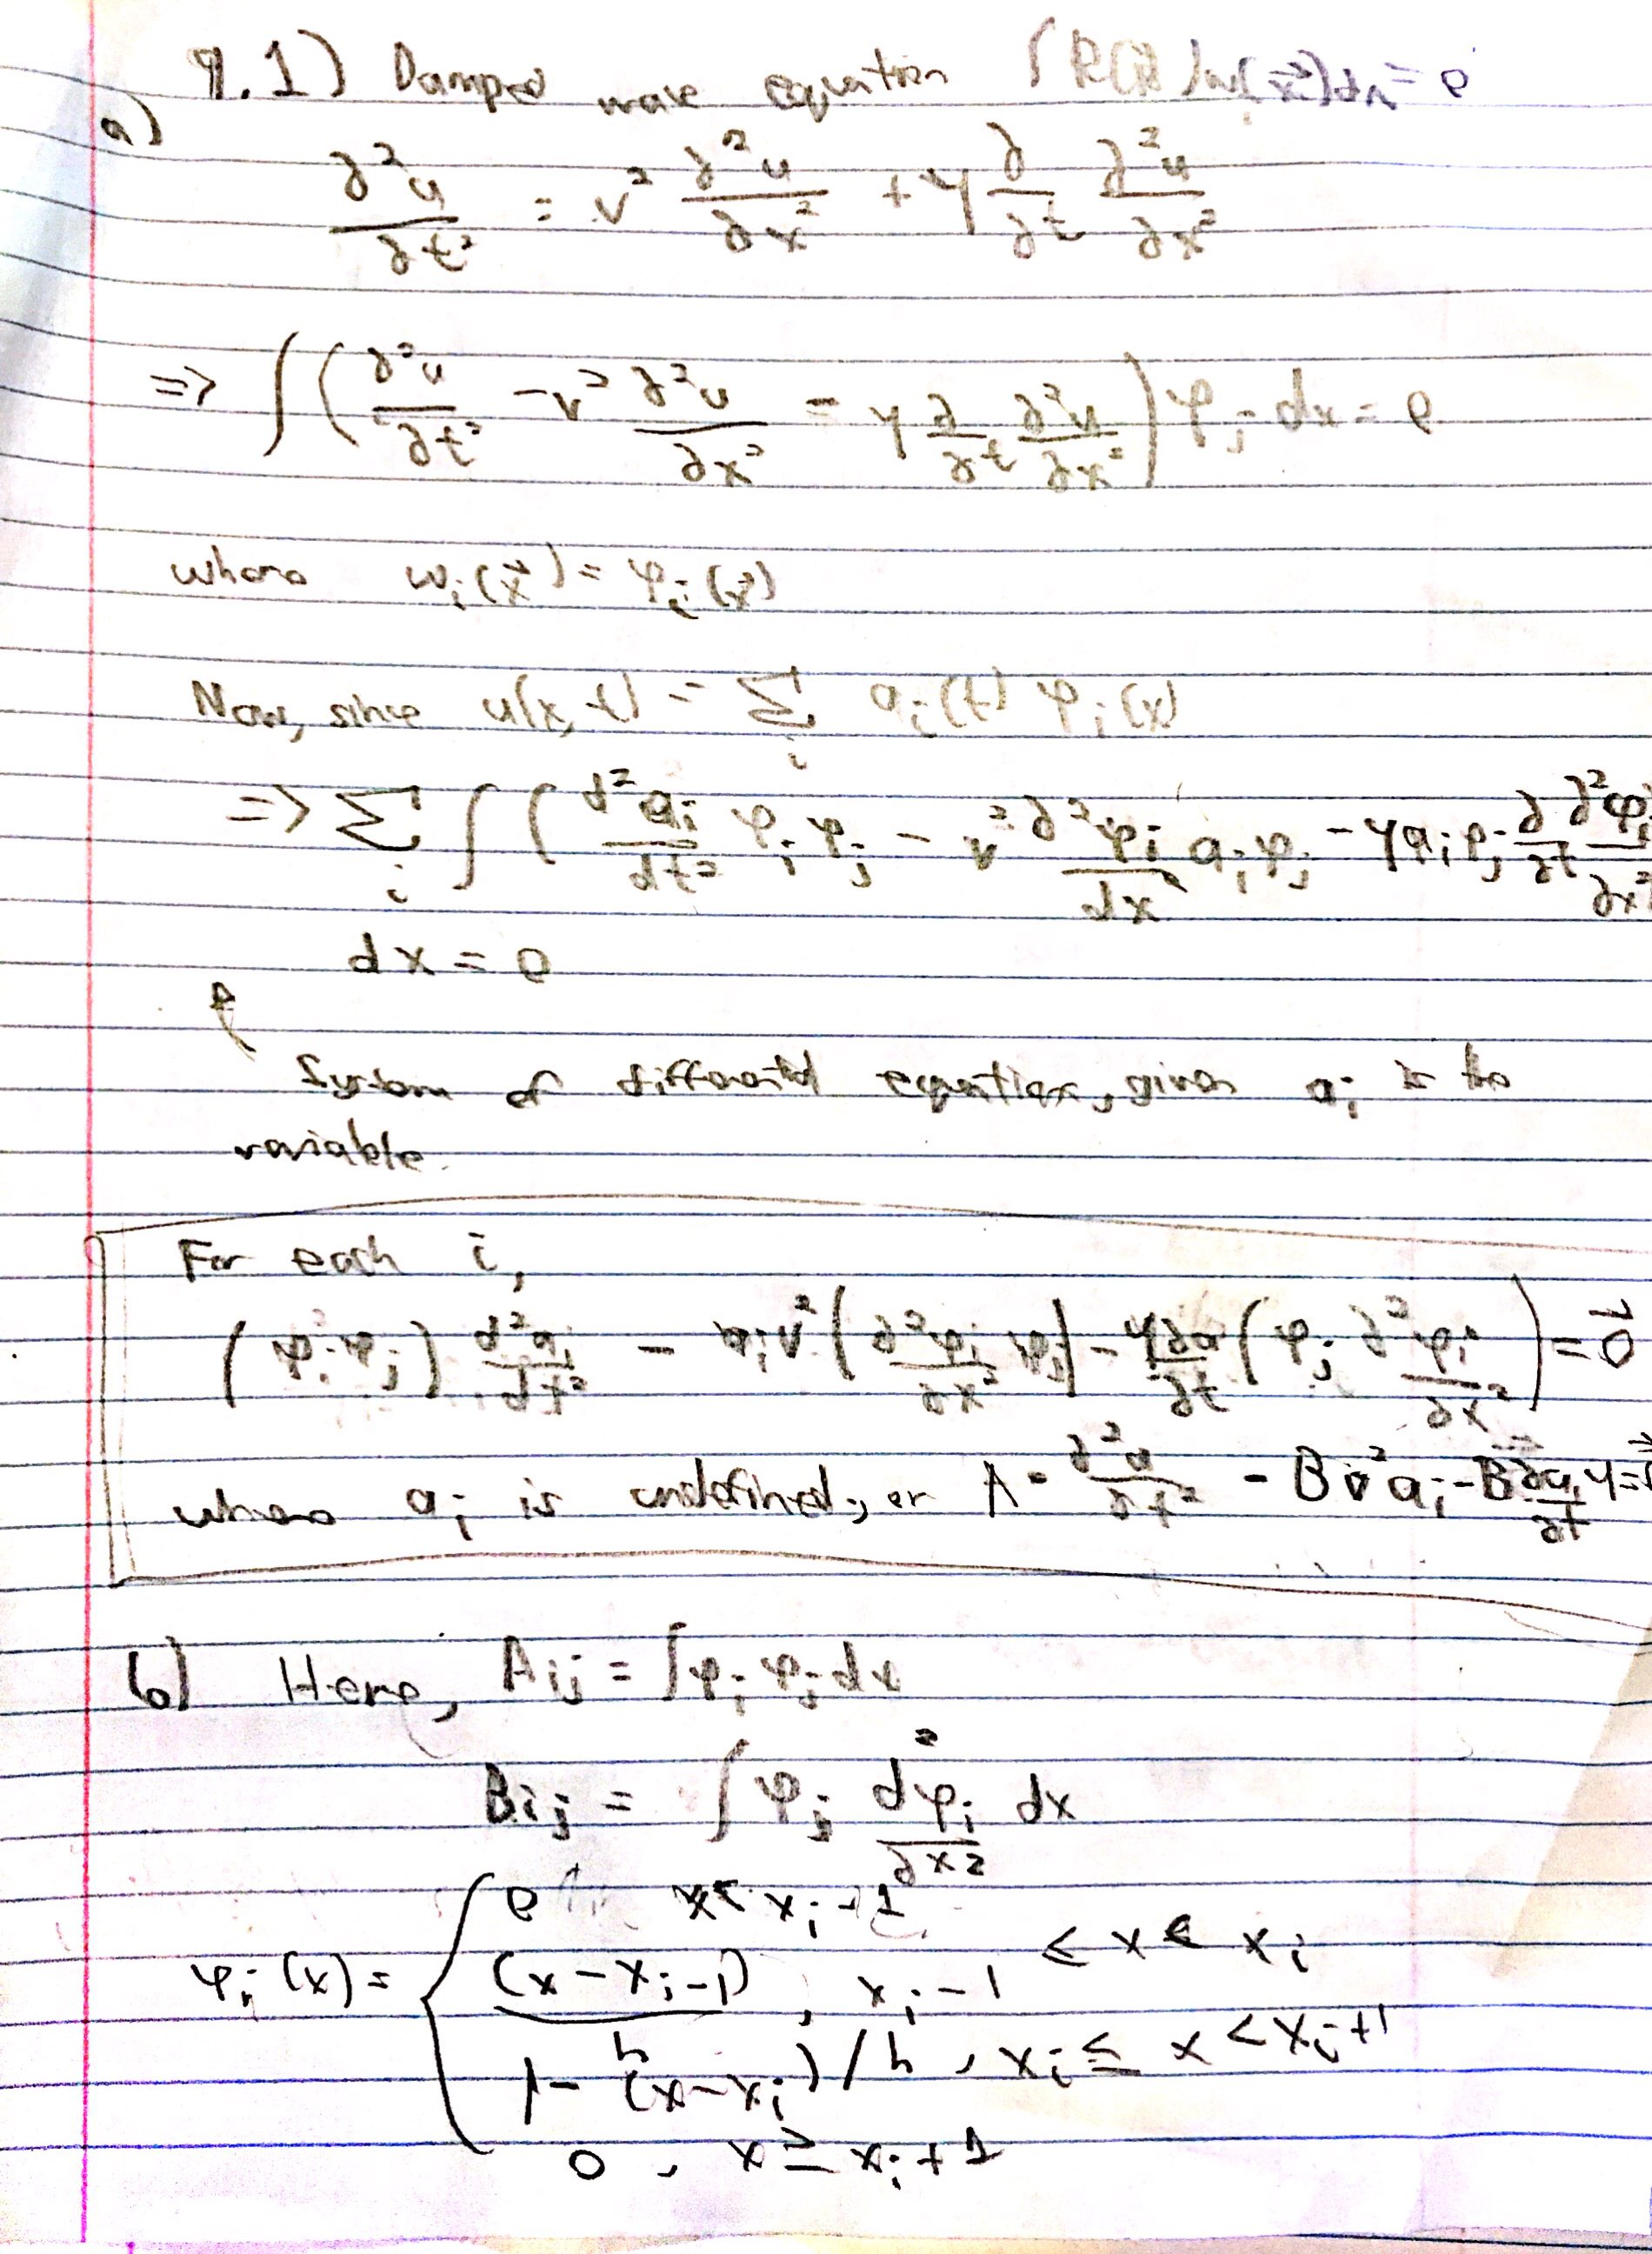

In [60]:
from IPython.display import Image
Image(filename='files/week5_91a.jpg')

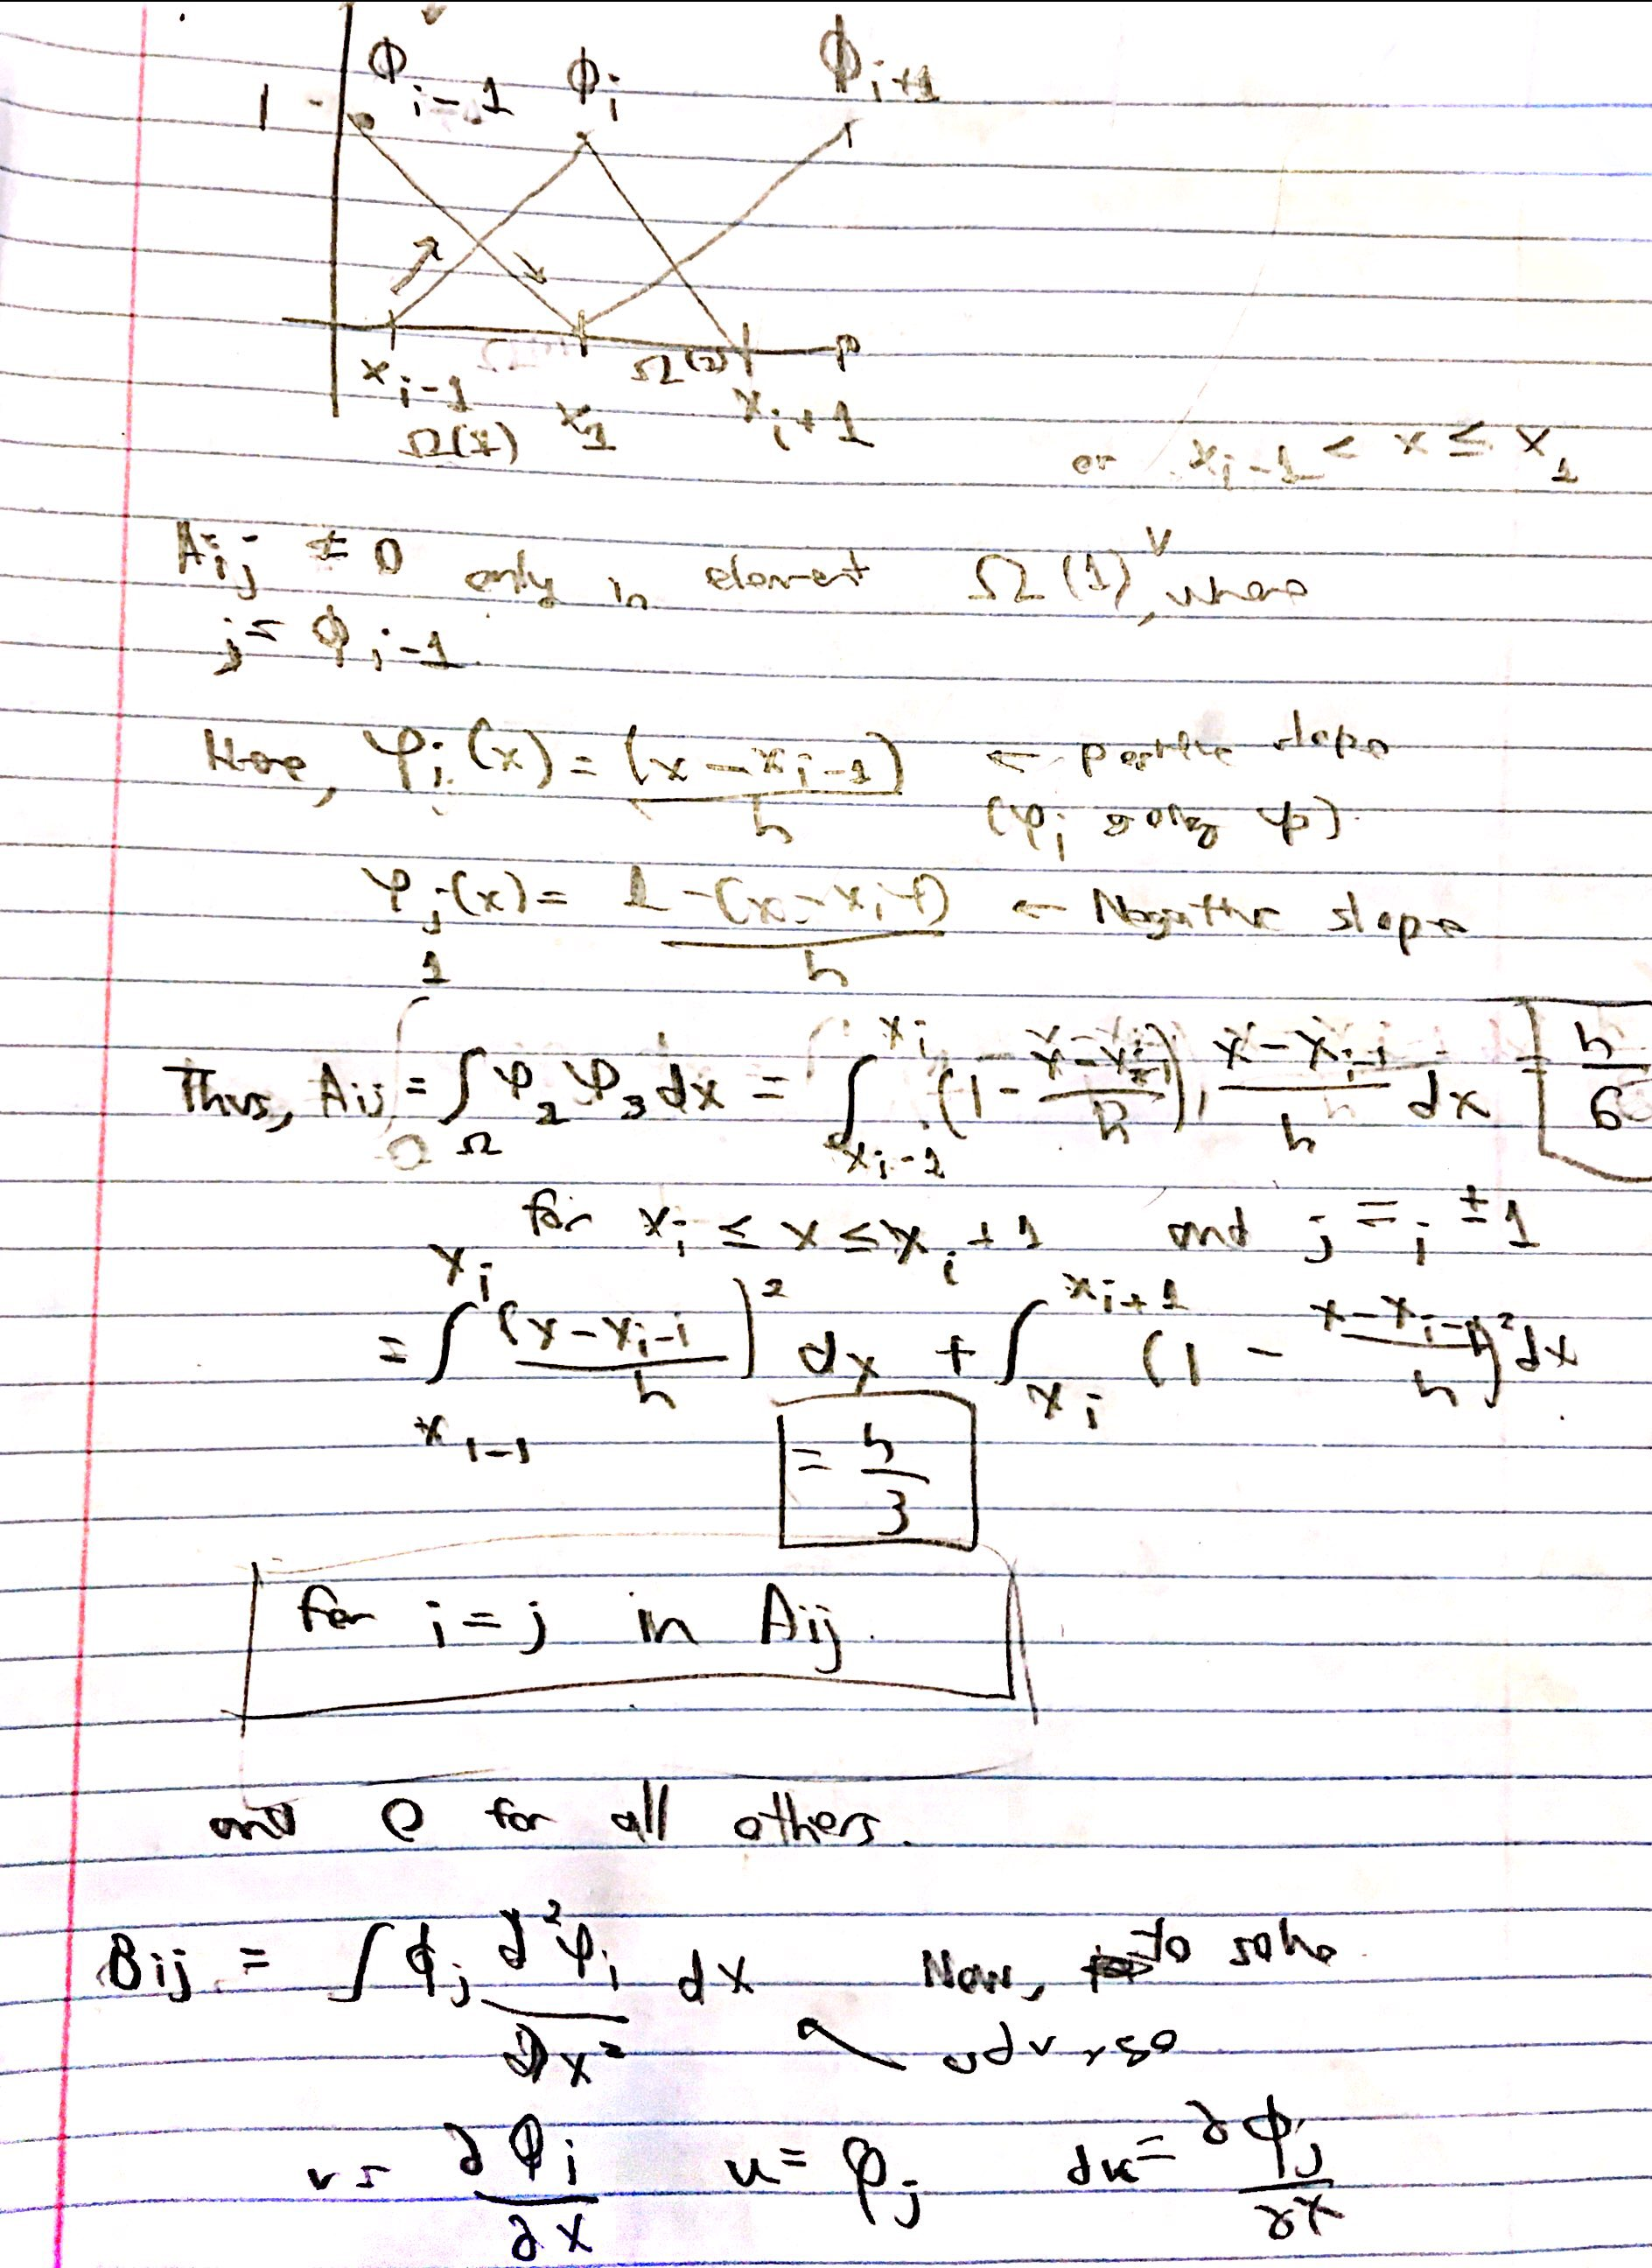

In [61]:
from IPython.display import Image
Image(filename='files/week5_91b.jpg')

c) Now find the matrix coefficients for Hermite polynomial interpolation basis functions, once again using elements with a fixed size of h. A symbolic math environment is useful for this problem.

In [47]:
%%javascript
var abs = Math.abs;

function array_fill(i, n, v) {
    var a = [];
    for (i= 0; i < n; i++) {
        a.push(v);
    }
    return a;
}
window.array_fill = array_fill;
function gauss(A, x) {
    //TODO: Can implement this in numpy, slice and dice 
    var i, k, j;

    for (i=0; i < A.length; i++) { 
        A[i].push(x[i]);
    }
    var n = A.length;
    
    for (i=0; i < n; i++) { 
        var maxEl = abs(A[i][i]),
            maxRow = i;
        for (k=i+1; k < n; k++) { 
            if (abs(A[k][i]) > maxEl) {
                maxEl = abs(A[k][i]);
                maxRow = k;
            }
        }

        for (k=i; k < n+1; k++) { 
            var tmp = A[maxRow][k];
            A[maxRow][k] = A[i][k];
            A[i][k] = tmp;
        }

        for (k=i+1; k < n; k++) { 
            var c = -A[k][i]/A[i][i];
            for (j=i; j < n+1; j++) { 
                if (i===j) {
                    A[k][j] = 0;
                } else {
                    A[k][j] += c * A[i][j];
                }
            }
        }
          
    }
var x = array_fill(0, n, 0);
   for (i = (n-1);  i > -1; i--) {
       x[i] = A[i][n]/A[i][i];
        for (k=i-1; k > -1; k--) { 
            A[k][n] -= A[k][i] * x[i];
        }
    }
    return x; 
}
window.gauss = gauss;


<IPython.core.display.Javascript object>

In [52]:
%%javascript
// I tried to import using JS but was having a lot of trouble
// so I ended up just using a python script tand d calculated the inverse 
// of the matrix 

//Here's my JS code though

/**
var h = Symbol("h");
var x = Symbol("x");
function convertToPolynomial(a) {
    return a[0]+a[1]*x+a[2]*x**2+a[3]*x**3;
}
var matrix = [[1,0,0,0],[0,1,0,0],[1,h,h,2),math.pow(h,3)],[0,1,2*h,3*math.pow(h,2)]];
var b1 = convertToPolynomial(window.gauss(matrix, [1,0,0,0]));
var b2 = convertToPolynomial(window.gauss(matrix, [0,1,0,0]));
var b3 = convertToPolynomial(window.gauss(matrix, [0,0,1,0]));
var b4 = convertToPolynomial(window.gauss(matrix, [0,0,0,1]));
**/
// Here, cases: i=j, i = j+1 (even), i = j+1 (odd)
/**
1 - 3*x**2/h**2 + 2*x**3/h**3
x - 2*x**2/h + x**3/h**2
3*x**2/h**2 - 2*x**3/h**3
-x**2/h + x**3/h**2

<IPython.core.display.Javascript object>

Since A_ii = integral of phi_i phi_j  dx

In [7]:
from sympy import *
#integrate(b1*b1, (x, 0, h));
# phi_1, phi_2, phi_3, ph_4 = b1, b2, b3, b4 from above 
# I used the following code below 
# df = diff(f1, x)
b1 = 10
A = integrate(b1*b1, (x, 0, h)) # integrates w.r.t. dx
# B = integrate(b1*(df*df), (x, 0, h))


NameError: name 'h' is not defined

Aii = 13*h/35    
 Bii = 3/(5*h)


 
(9.2) Model the bending of a beam (equation 9.29) under an applied load. Use Hermite polynomial interpolation, and boundary conditions fixing the displacement and slope at one end.

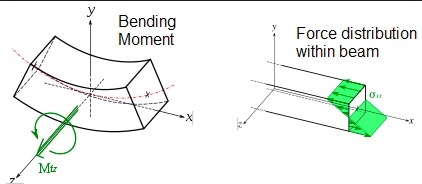

In [54]:
Image(filename='files/beam.jpg')

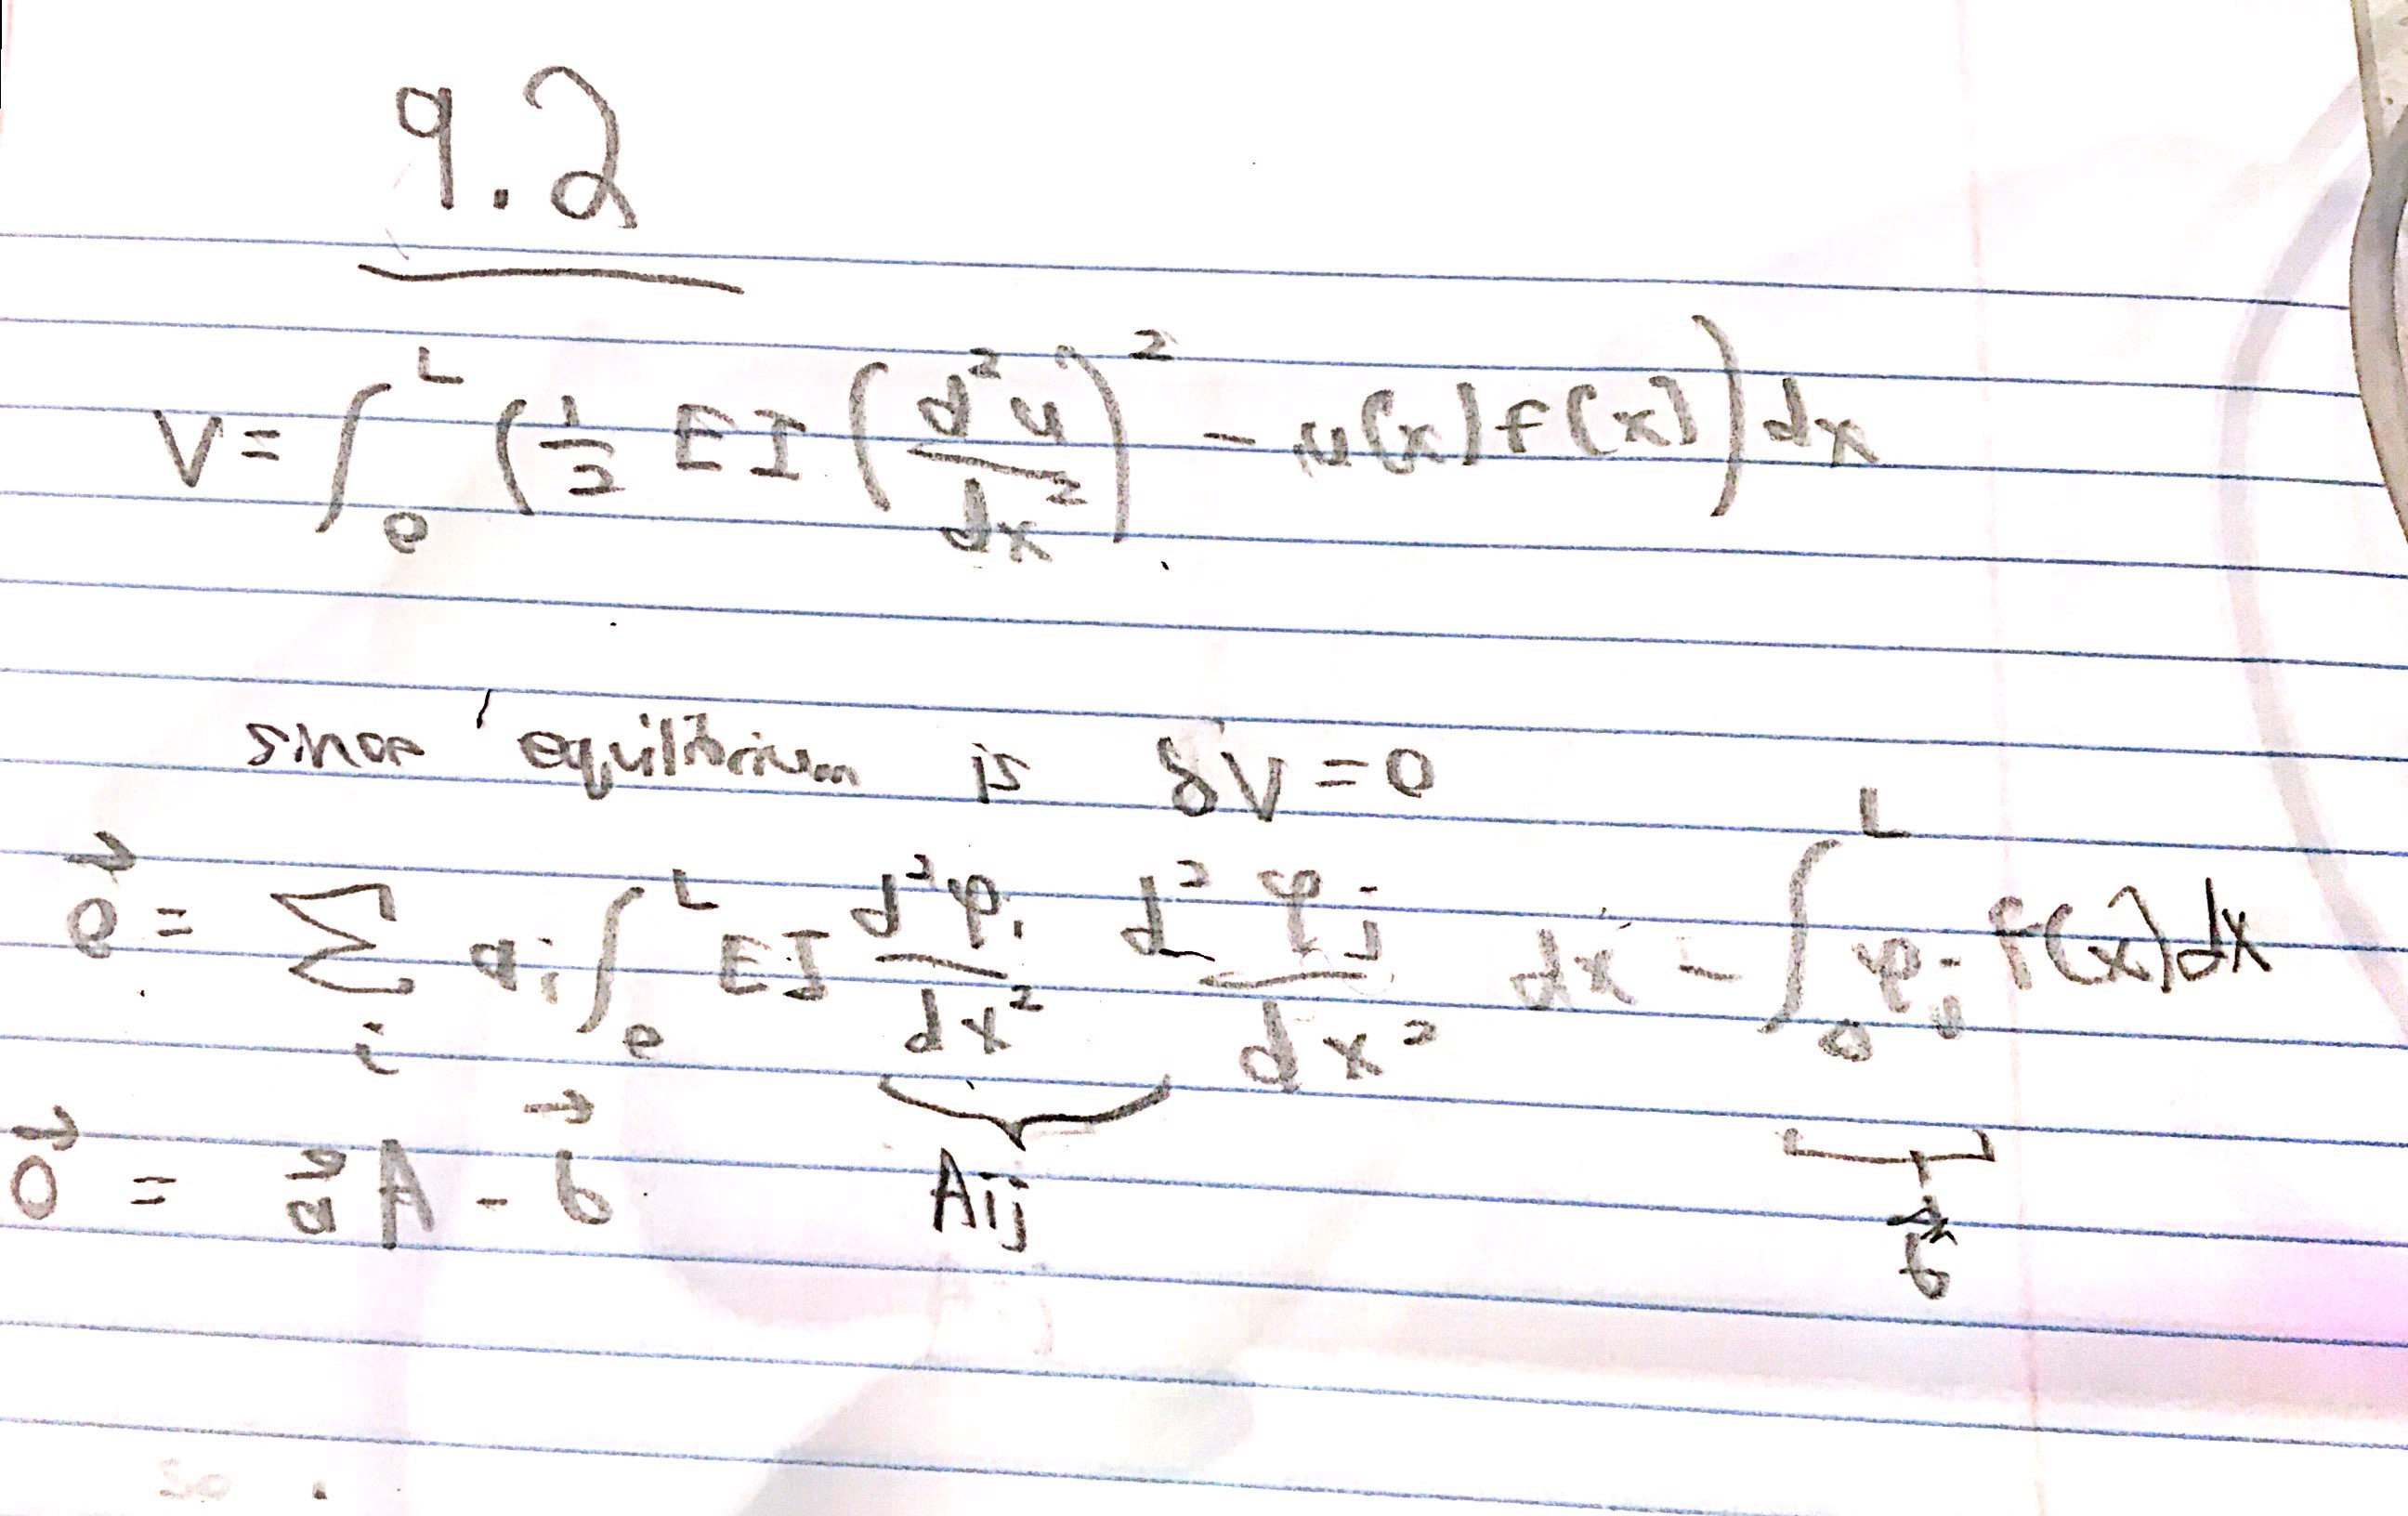

In [2]:
from IPython.display import Image
Image(filename='files/week5_92.jpg')

Now, we solve for the phi by runnng through the below functions to find the bending of a beam. h is the size of the elements. Here, the parameters is h, E, I, and f(x). E is elasticity, I is moment of inertia, and f(x) is the acting force. 
Below is me trying to figure out what the matrix problem will look like. 

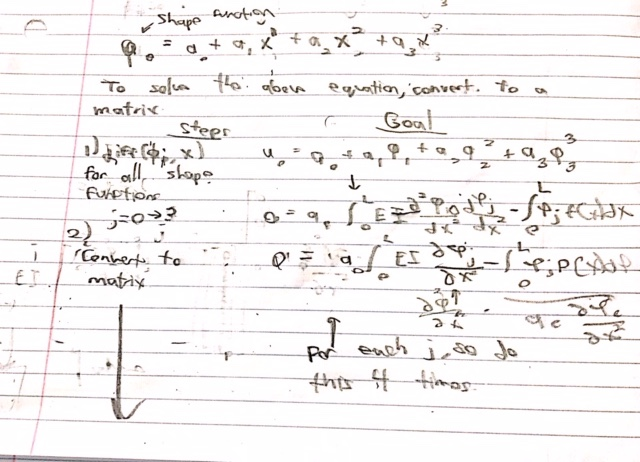

In [21]:
Image(filename='files/week5_92b.jpg')

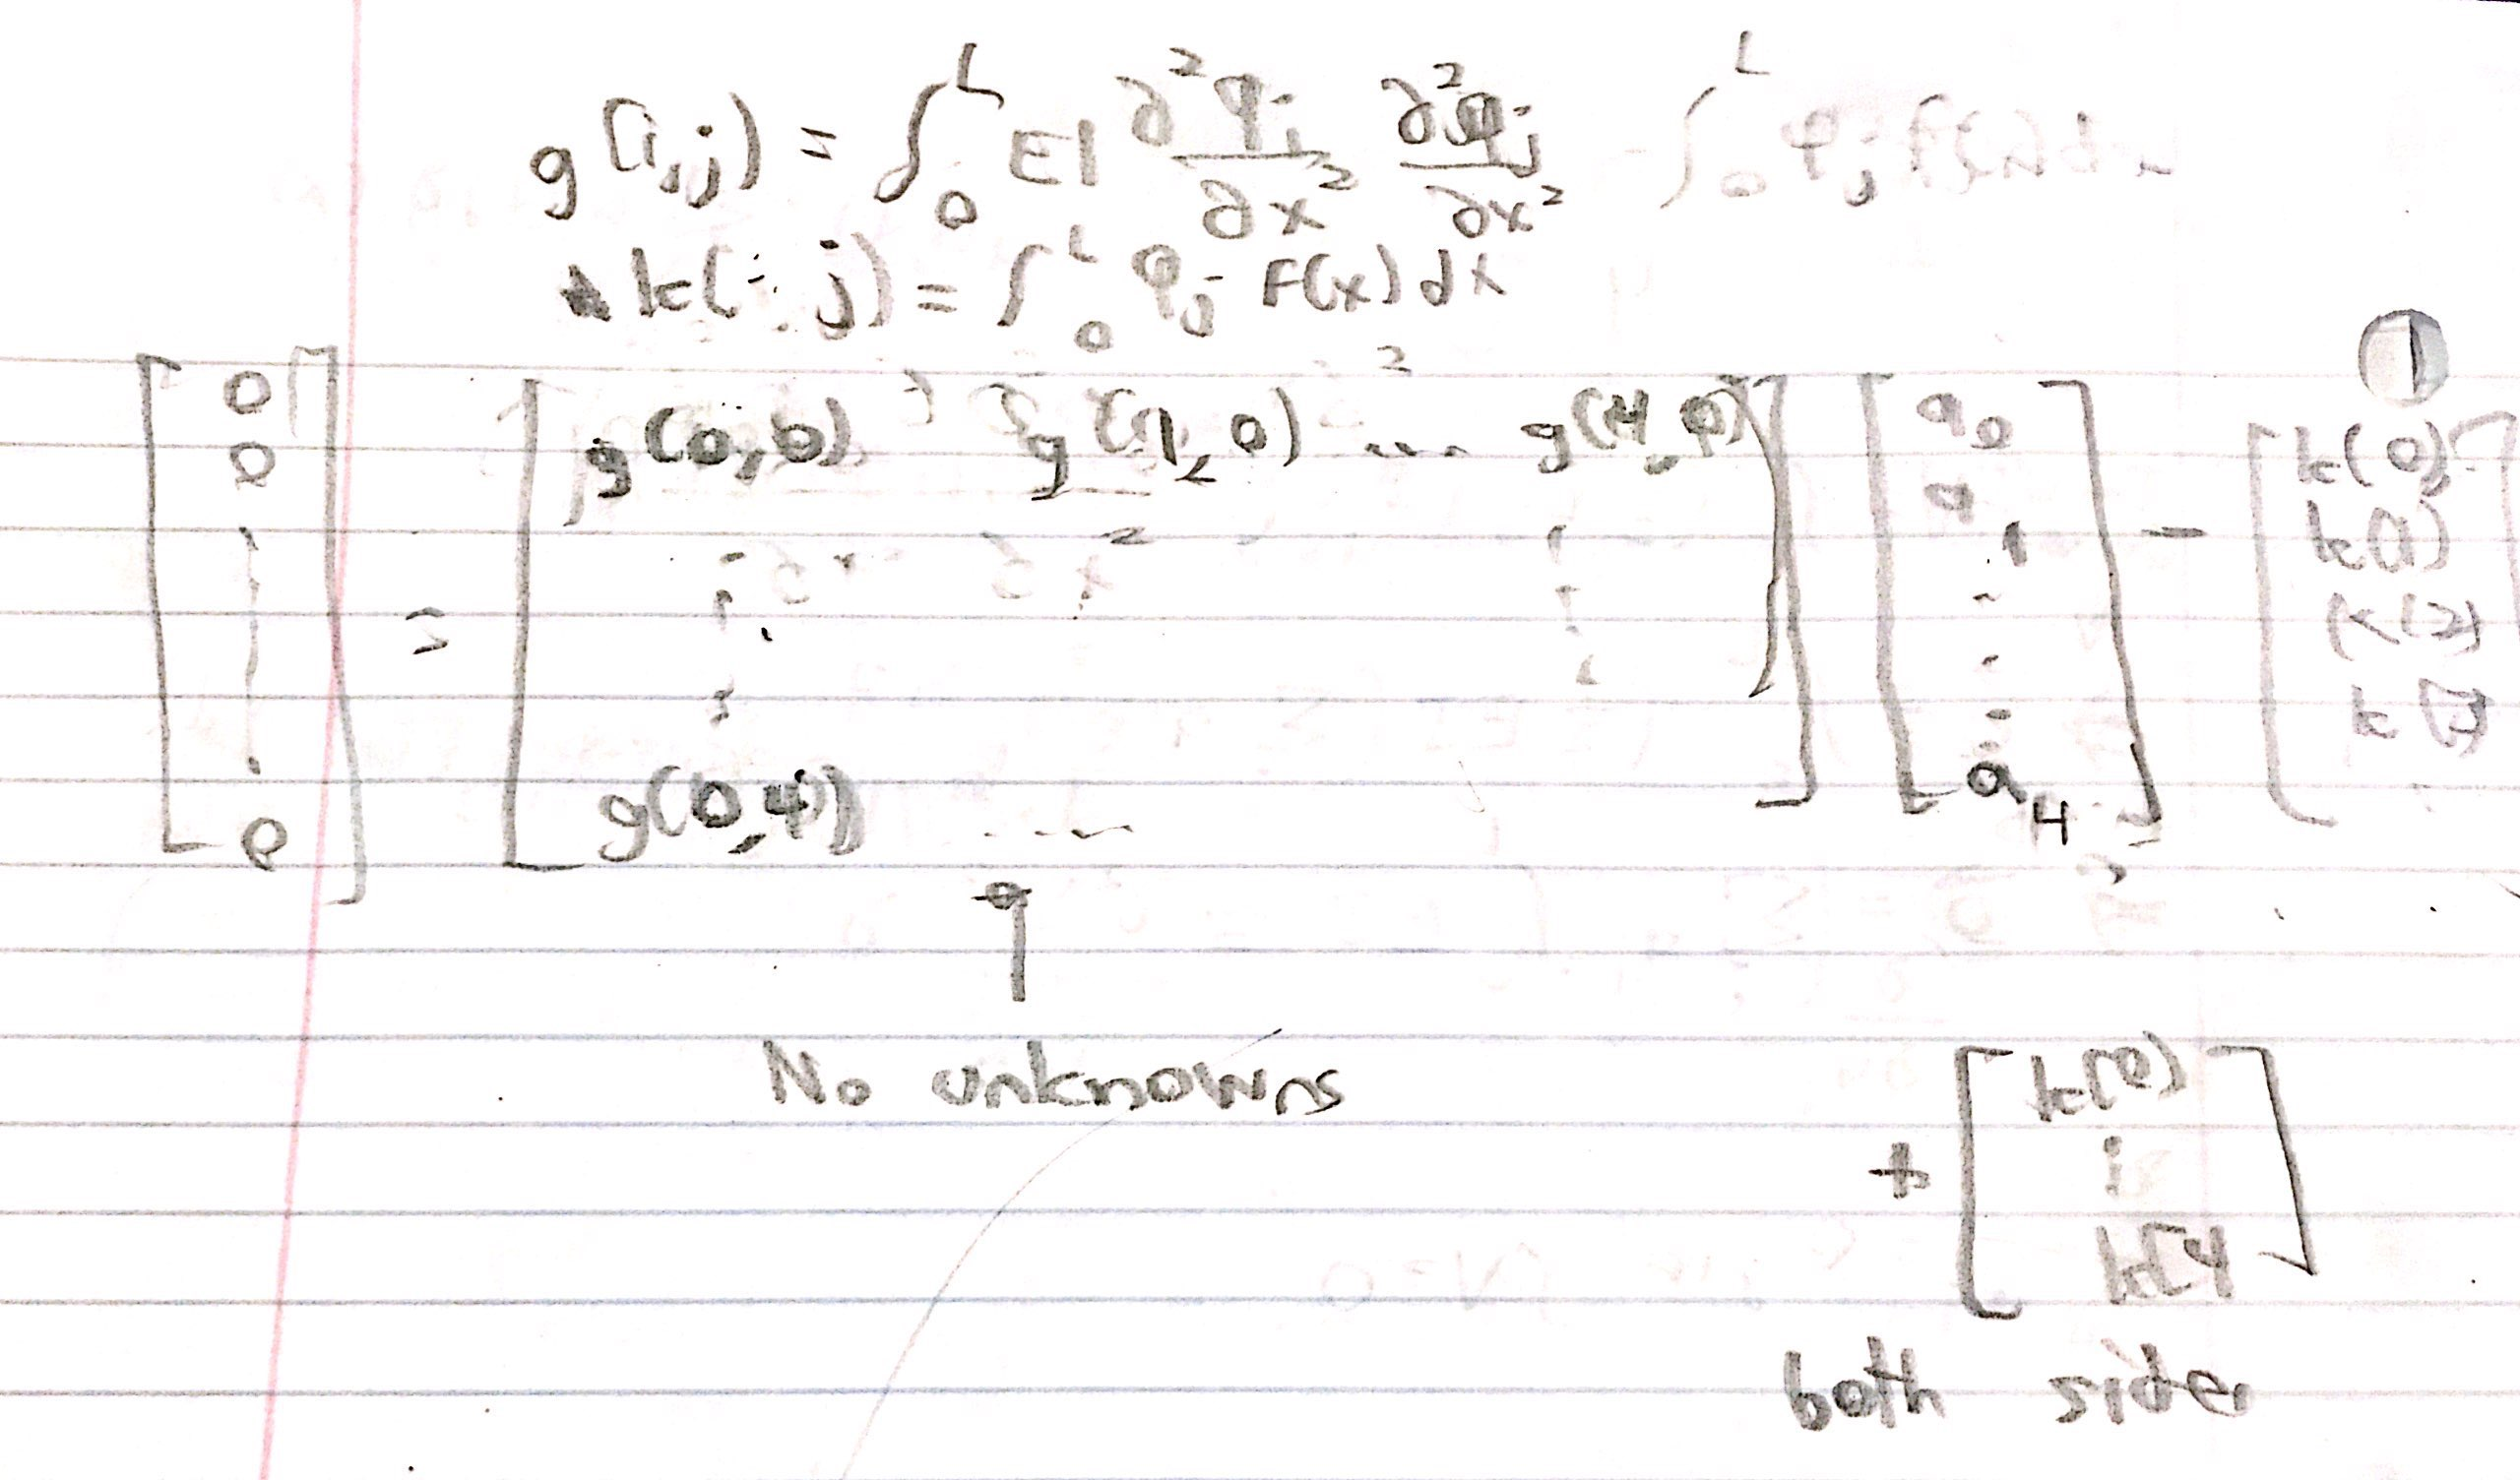

In [24]:
Image(filename='files/week5_92c.jpg')

In [50]:
%%javascript
// Function to find the 
var x = Symbol("x");
/** I still have to figure out the Javascript environemnt **/
function convertToPolynomial(a) {
    // from 9.21 in text
    return a[0]+a[1]*x+a[2]*x**2+a[3]*x**3;
}

function prepare(E, I, fx, phis, diffs) {
    var i, j;
      for (i=0; i< 4; i++) {
        var row = []
        for (j=0; j < 4; j++) {
            row.push(E*I*diffs[i]*diffs[j])
        }
        A.push(row);
    }
    console.log(A);
    var sol = []; 
    var k = function(j) {
        return phis[j]*fx;
    }
    for (j=0; j< 4; j++) {
        sol.push(k[j])
    }
    return A, sol;
    
}
function beamModel(h, E, I, fx){
    console.log("here");
    var matrix = [[1,0,0,0],
                  [0,1,0,0],
                  [1,h, h**2, h**3],
                  [0,1,2*h,3*(h**2)]];
    //The shape functions
    var b1 = convertToPolynomial(window.gauss(matrix, [1,0,0,0]));
    var b2 = convertToPolynomial(window.gauss(matrix, [0,1,0,0]));
    var b3 = convertToPolynomial(window.gauss(matrix, [0,0,1,0]));
    var b4 =  convertToPolynomial(window.gauss(matrix, [0,0,0,1]));
    var phis = [b1, b2, b3, b4]; 
    var A = []
    var i, j;
    var diffs = [(diff(b1, x)*diff(b1, x)), 
                 (diff(b2, x)*diff(b2, x)), 
                 (diff(b3, x)*diff(b3, x)),
                 (diff(b4, x)*diff(b4, x))]
    var A, sol = prepare(E, I, fx, phis, diffs)
    console.log(A);
    console.log(sol);
    //TODO: Debug how to import mathjs for integrate function T.T
    //Right now I'm literally just calculating the integrals of this in another 
    //environment
    // Solve for the a0...an
    return
    
}

// Now, for E = 1, I = 1, fx = x^2, h = 0.5 
var hCurr = 0.5;
var ECurr = 1;
var ICurr = 1; 
var fxCurr = function(x) { 
    return x**2;
}
beamModel(hCurr, ECurr, ICurr, fxCurr);

<IPython.core.display.Javascript object>

# Applications of Finite Element Methods 
## To summarize, the "intuitive" learnings this week is:
In FEMs, you cut the function domain into subodmains. If a particular variable is modeled by a function f, 
then locally find the sub_fs for each subdomain that best fits the data generated by f for that subdomain. 
You can do this by using either the Galerkin method (simpler to code, but "choppier" approximation), or 
Hermite (smoother approximation). 
## Applicatiosn of FEMs (from Quora):
Some areas that might not be obvious is using FE to solve PDEs involved with control and AI, such as the Hamilton–Jacobi–Bellman partial differential equation.
The car you drive was likely "crashed" tens of thousands of times using FEA, before a physical one was ever built.  I would contend that explicit FEA is the primary reason for 5 star crash ratings; without it, cars would not so consistently achieve those marks.  Similarly, qualify of engines, chassis and suspension, and body durability have all been improved dramatically by applying the finite element method across vehicle systems and components.

3D printing is a complex process that involves phase changes, thermal interactions etc. It’s again a coupled problem.


